# **Harleen Kaur Bagga**

# The Zen of Python

In [2]:
import this#the purpose of this module is to convey the guidelines related to the python code
            

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Setting up Quandl for your environment

In [11]:
import pandas# pandas is a software library written for the Python programming language for data manipulation and analysis.
pandas.__version__#check what is the pandas version in your system

'1.1.3'

# Plotting your first chart

## Retrieving dataset from Quandl

In [12]:
import quandl#The Quandl package uses our API and makes it amazingly easy to get financial data

# Replace with your own Quandl API key
QUANDL_API_KEY = 'hStyLcagr8e3bzH95Wba'#Quandl API key is stored in the constant variable, QUANDL_API_KEY 
                                       #it can be reused again in further part of the code
quandl.ApiConfig.api_key = QUANDL_API_KEY#used to set API key
df = quandl.get('EURONEXT/ABN')#download the ABN datset from the quandl into the df variable

In [4]:
df.head()#print first 5 rows

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2015-11-20,18.18,18.43,18.000,18.35,38392898.0,7.003281e+08
2015-11-23,18.45,18.70,18.215,18.61,3352514.0,6.186446e+07
2015-11-24,18.70,18.80,18.370,18.80,4871901.0,8.994087e+07
2015-11-25,18.85,19.50,18.770,19.45,4802607.0,9.153862e+07
2015-11-26,19.48,19.67,19.410,19.43,1648481.0,3.220713e+07


In [15]:
df.tail()#print last 5 rows

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2021-05-26,10.89,10.890,10.496,10.644,3447200.0,36676187.0
2021-05-27,10.60,10.980,10.584,10.902,3498258.0,38042273.0
2021-05-28,10.90,10.998,10.856,10.964,3001692.0,32847836.0
2021-05-31,11.00,11.030,10.920,10.920,1426676.0,15650390.0
2021-06-01,10.98,11.220,10.980,11.142,2689318.0,29976401.0


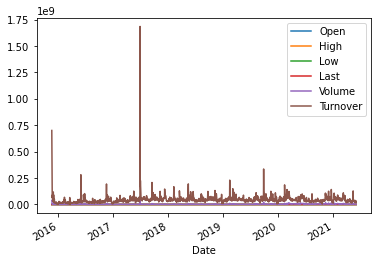

In [20]:

%matplotlib inline
import matplotlib.pyplot as plt #Machine Learning library to create plots and data visualizations

df.plot();#plot a Line chart in Python using Matplotlib based on the quandl dataset

## Plotting a price and volume chart

In [17]:
prices = df['Last']#last trading price of each year is stored in variable prices
volumes = df['Volume']#Volume i.e. no of shares traded in a stock is stored in variable volumes

In [18]:
prices.head()#print the first 5 rows

Date
2015-11-20    18.35
2015-11-23    18.61
2015-11-24    18.80
2015-11-25    19.45
2015-11-26    19.43
Name: Last, dtype: float64

In [19]:
volumes.tail()#print the last 5 rows

Date
2021-05-26    3447200.0
2021-05-27    3498258.0
2021-05-28    3001692.0
2021-05-31    1426676.0
2021-06-01    2689318.0
Name: Volume, dtype: float64

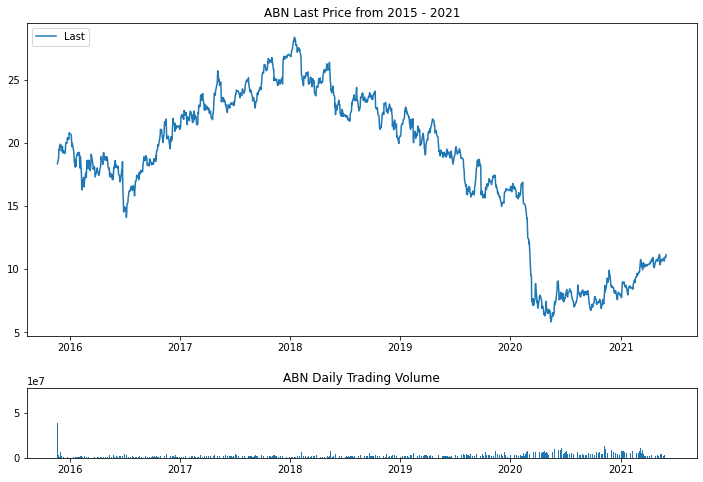

In [21]:
# The top plot consisting of daily closing trading prices


top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)# (4,4) is the shape of the grid in which we palce our graph
                                            # (0,0) specifies the axis will be located at (0,0) location in the grid
                                            #rowspan=3 indicates graph will span by 3 to the right 
                                            #colspan=4 plot will span graph by 4 downwards
top.plot(prices.index, prices, label='Last')#date and time value on the x axis
                                            #prices on the y axis
plt.title('ABN Last Price from 2015 - 2021')#  title of the plot
plt.legend(loc=2)#function to plot the legend
# The bottom plot consisting of daily trading volume
bottom = plt.subplot2grid((4, 4), (3,0), rowspan=1, colspan=4)# (4,4) is the shape of the grid in which we place our graph
                                            # (3,0) specifies the given axis will be located at (3,0) location of the grid
                                            #rowspan=1 indicates graph will span by 1 to the right 
                                            #colspan=4 plot will span  graph by 4 downwards
bottom.bar(volumes.index, volumes)#bar plot showing comparisons 
                               
plt.title('ABN Daily Trading Volume')# title of the plot
                                  
plt.gcf().set_size_inches(12, 8)# figure 12 inches wide and 8 inches high
plt.subplots_adjust(hspace=0.75)#add a small amount of padding between subplots

## Plotting a candlestick chart


### **In the following example we query from quandl the daily prices for the month of July 2018 as our dataset and plot the Candle stick chart**

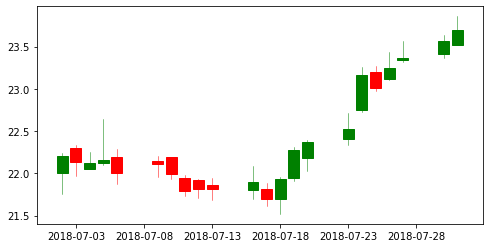

In [22]:
%matplotlib inline
import quandl#The Quandl package uses our API and makes it amazingly easy to get financial data
from mplfinance.original_flavor import candlestick_ohlc#library imported for creating Matplotlib Candlestick Chart
import matplotlib.dates as mdates#library to set date
import matplotlib.pyplot as plt#Machine Learning library to create plots and data visualizations

quandl.ApiConfig.api_key = QUANDL_API_KEY#quandl API key stored above assigned
df_subset = quandl.get('EURONEXT/ABN', 
                       start_date='2018-07-01', 
                       end_date='2018-07-31')
                         #start date and end date specified to retrieve the dataset for a specific range

df_subset['Date'] = df_subset.index.map(mdates.date2num)# Matplotlib date assigned to Date column
                                                         
df_ohlc = df_subset[['Date','Open', 'High', 'Low', 'Last']]
#'Date','Open', 'High', 'Low', 'Last' columns are assigned to df_ohlc

figure, ax = plt.subplots(figsize = (8,4))#creates a plot figure with 8 inches wide and 4 inches high.
formatter = mdates.DateFormatter('%Y-%m-%d')#format the Date to the form year-month-date
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax, 
                 df_ohlc.values, 
                 width=0.8,        #candlestick width 0.8 
                 colorup='green', #upticks are green
                 colordown='red')#downticks are red
                                
                               
plt.show()#display the candlestick chart

# Performing Financial Analytics

## Plotting returns

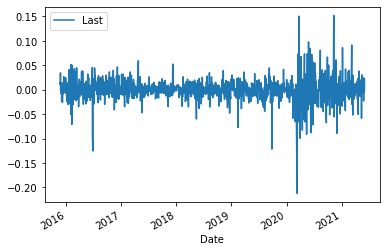

In [23]:
%matplotlib inline
import quandl#The Quandl package uses our API and makes it amazingly easy to get financial data

quandl.ApiConfig.api_key = QUANDL_API_KEY#quandl API key stored above asigned
df = quandl.get('EURONEXT/ABN.4')#download the fourth column of the ABN dataset(which contains the last prices) from the quandl into the df variable

daily_changes = df.pct_change(periods=1)#1 period shift  to form the percentage change
daily_changes.plot();#display the chart

## Plotting cummulative returns

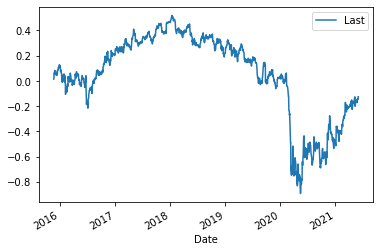

In [24]:
#cumsum method of pandas returns the cumulative sum of DataFrame
df_cumsum = daily_changes.cumsum()#cumulative sum of daily changes
df_cumsum.plot();#plot the chart

## Plotting Histograms

### ***Histogram tells us how distributed the data is .***

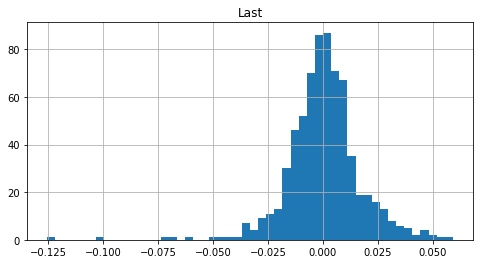

In [20]:
#here we show  in histogram how distributed the daily return of ABN are
daily_changes.hist(bins=50, figsize=(8, 4));

In [25]:
daily_changes.describe()# summarize the central tendency,dispersion and shape of the ABN dataset's distribution

,Last
count,1408.000000
mean,-0.000089
std,0.022877
min,-0.212453
25%,-0.009574
50%,0.000283
75%,0.009749
max,0.152042


## Plotting volatility

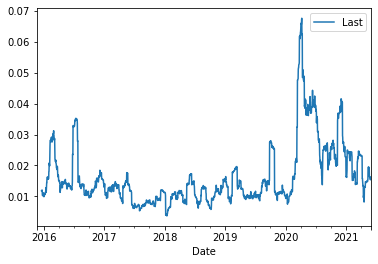

In [26]:
df_filled = df.asfreq('D', method='ffill')
df_returns = df_filled.pct_change()#percentage change from the immediately previous row 
df_std = df_returns.rolling(window=30, min_periods=30).std()
#standard deviation of the percentage change of our computed ABN dataset 


df_std.plot();#plot the volatility chart

## Quantile-Quantile Plot

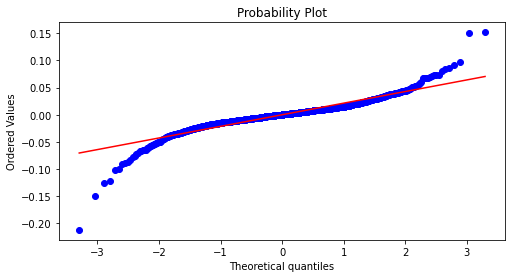

In [27]:
%matplotlib inline
import quandl#The Quandl package uses our API and makes it amazingly easy to get financial data
from scipy import stats 
from scipy.stats import probplot

quandl.ApiConfig.api_key = QUANDL_API_KEY#quandl API key stored above assigned
df = quandl.get('EURONEXT/ABN.4')#download the fourth column of the ABN datset(which contains the last prices) 
daily_changes = df.pct_change(periods=1).dropna()#1 period shift  to form the percentage change of the dataset
                                        #dropna is to remove missing values of dataset

figure = plt.figure(figsize=(8,4))#figure object will be 8 inches wide and 4 inches high
ax = figure.add_subplot(111)#1x1 grid,first subplot assigned to variable ax
stats.probplot(daily_changes['Last'], dist='norm', plot=ax)#probplot helps us to claculate and show quantiles of probablity plot
plt.show();#plot the chart



## Downloading multiple time series data

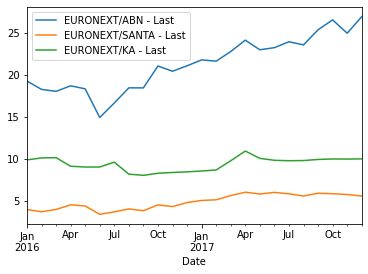

In [28]:
%matplotlib inline
import quandl#The Quandl package uses our API and makes it amazingly easy to get financial data

quandl.ApiConfig.api_key = QUANDL_API_KEY#quandl API key stored above assigned
df = quandl.get(['EURONEXT/ABN.4', #last prices downloaded from ABN dataset
                 'EURONEXT/SANTA.4', #last prices downloaded from SANTA dataset
                 'EURONEXT/KA.4'], #last prices downloaded from KA dataset
                collapse='monthly', # download monthly prices
                start_date='2016-01-01', #two year prices from 2016 - 2017 stored in df variable 
                end_date='2017-12-31')
df.plot();#plot the chart

## Displaying the Correlation Matrix


In [29]:
#Correlation is a stastical association of how closely two variables movie in relation to each other
df.pct_change().corr()#correlation among the columns in df
                      #output of the three dataset ABN ,SANTA,EURONEXT is displayed in the form of a matrix

,EURONEXT/ABN - Last,EURONEXT/SANTA - Last,EURONEXT/KA - Last
EURONEXT/ABN - Last,1.000000,0.809824,0.096238
EURONEXT/SANTA - Last,0.809824,1.000000,0.058095
EURONEXT/KA - Last,0.096238,0.058095,1.000000


## Plotting Correlations

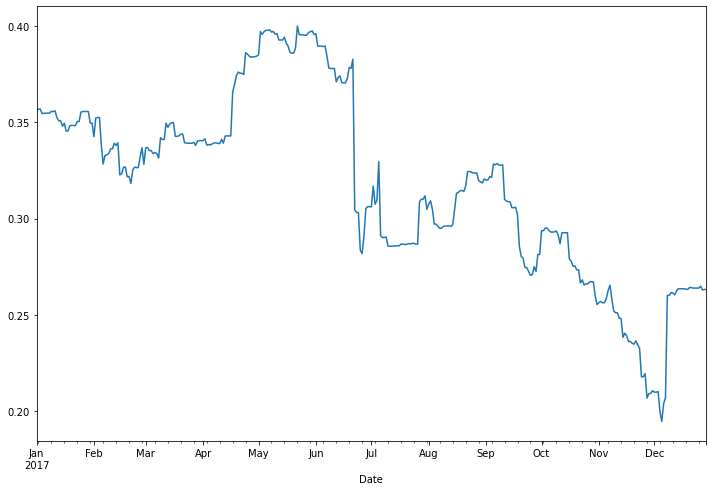

In [33]:
%matplotlib inline
import quandl#The Quandl package uses our API and makes it amazingly easy to get financial data

quandl.ApiConfig.api_key = QUANDL_API_KEY#quandl API key stored above assigned
df = quandl.get(['EURONEXT/ABN.4', 'EURONEXT/SANTA.4'], #last prices of ABN and SANTA dataset assigned to varaible df
                start_date='2016-01-01', 
                end_date='2017-12-31')

df_filled = df.asfreq('D', method='ffill')
daily_changes= df_filled.pct_change()#pct_change for percentage change from the immediately previous row by default
abn_returns = daily_changes['EURONEXT/ABN - Last']#daily percentage returns and columns of ABN dataset extracted into abn_returns
santa_returns = daily_changes['EURONEXT/SANTA - Last']#daily percentage returns and columns of Santa dataset extracted into santa_returns
window = int(len(df_filled.index)/2)#window variables store the average number of years in two yr dataset
      
df_corrs = abn_returns\
    .rolling(window=window, min_periods=window)\
    .corr(other=santa_returns)\
    .dropna()

           
    
df_corrs.plot(figsize=(12, 8));#displays the chart 

## Simple moving averages


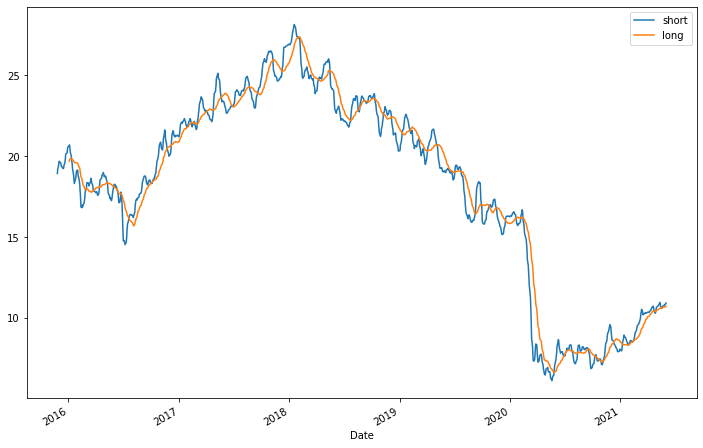

In [34]:
#simple moving average (SMA), is calculated by taking the arithmetic mean of a given set of values
%matplotlib inline
import quandl#The Quandl package uses our API and makes it amazingly easy to get financial data
import pandas as pd#Used for high level Data Indexing processes

quandl.ApiConfig.api_key = QUANDL_API_KEY#quandl API key stored above assigned
df = quandl.get('EURONEXT/ABN.4')#last prices of ABN dataset assigned to varaible df

df_filled = df.asfreq('D', method='ffill')
df_last = df['Last']#last prices extracted to df_last


series_short = df_last.rolling(window=5, min_periods=5).mean()#Calculating the short window simple moving average
                                            #assigning the generated series to variable series_short

series_long = df_last.rolling(window=30, min_periods=30).mean()# Calculating the long-window simple moving average
                                             #assigning the generated series to variable series_long

df_sma = pd.DataFrame(columns=['short', 'long'])#two new columns 'short' and 'long' created for variable df_sma 
df_sma['short'] = series_short#'short' column assigned short window simple moving average
df_sma['long'] = series_long#'long' column assigned long window simple moving average
df_sma.plot(figsize=(12, 8));#plot the chart demonstrating behaviour of of both short window and long window simple moving average

## Exponential Moving Average


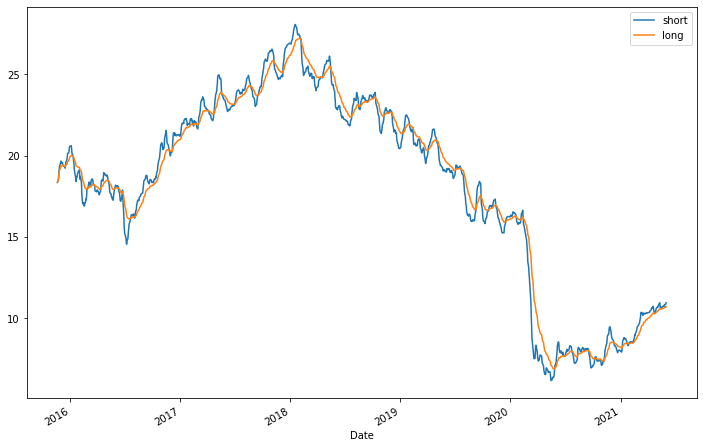

In [35]:
#exponential moving average is a type of moving average that gives more weight to recent prices.

%matplotlib inline
import quandl#The Quandl package uses our API and makes it amazingly easy to get financial data
import pandas as pd#Used for high level Data Indexing processes

quandl.ApiConfig.api_key = QUANDL_API_KEY#quandl API key stored above assigned
df = quandl.get('EURONEXT/ABN.4')#last prices of ABN dataset assigned to varaible df

df_filled = df.asfreq('D', method='ffill')
df_last = df['Last']
#ewm provide exponential weighted function mean()
series_short = df_last.ewm(span=5).mean()#Calculating the short window exponenetial moving average
                                            #assigning the generated series to variable series_short
series_long = df_last.ewm(span=30).mean()#Calculating the long window exponential moving average
                                            #assigning the generated series to variable series_long

df_sma = pd.DataFrame(columns=['short', 'long'])#two new columns 'short' and 'long' created for variable df_sma 
df_sma['short'] = series_short#'short' column assigned short window exponential moving average
df_sma['long'] = series_long#'long' column assigned long window exponential moving average
df_sma.plot(figsize=(12, 8));#plot the chart demonstrating behaviour of of both short window and long window exponential moving average